# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 


In [2]:
print(f'Shapes\nX: {X.shape}\ny: {y.shape}')

Shapes
X: (70000, 784)
y: (70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
# Check one entry
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

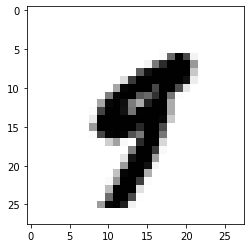

In [4]:
# Plot the image
plt.imshow(X[36000].reshape(28, 28), cmap="binary", interpolation="nearest");

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [5]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [6]:
# Holdout
X_train = X[:60000]
X_test = X[60000:]

y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [7]:
y_train5 = y_train == '5'
y_test5 = y_test == '5'

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [8]:
# Import library
from sklearn.linear_model import LogisticRegression

In [9]:
# Instance the model
lr = LogisticRegression(max_iter=2000)

# Train the model
lr.fit(X=X_train, y=y_train5)

c:\users\gabsn\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

### Does the classifier predict correctly the 36000th digit we picked before?

In [10]:
# Check the prediction for the 36000th digit
lr.predict(X[[36000]])

array([False])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [12]:
# Train the "model"
never_5_clf.fit(X=X_train, y=y_train5)

# Prediction
y_pred_never_5 = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [13]:
# Import the library
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score

In [14]:
# Predict using the Logistic Regression
y_pred_5 = lr.predict(X_test)

In [33]:
# Confusion matrix
print('CONFUSION MATRIX')

## Logistic Regression
print(f'Logistic Regression\n{confusion_matrix(y_true=y_test5, y_pred=y_pred_5)}')

## Classifier
print(f'\nClassifier\n{confusion_matrix(y_true=y_test5, y_pred=y_pred_never_5)}')

# Precision
print('\nPRECISION')

## Logistic Regression
print(f'Logistic Regression: {precision_score(y_true=y_test5, y_pred=y_pred_5, zero_division=0)}')

## Classifier
print(f'Classifier: {precision_score(y_true=y_test5, y_pred=y_pred_never_5, zero_division=0)}')

# Recall
print('\nRECALL')

## Logistic Regression
print(f'Logistic Regression: {recall_score(y_true=y_test5, y_pred=y_pred_5)}')

## Classifier
print(f'Classifier: {recall_score(y_true=y_test5, y_pred=y_pred_never_5)}')

# F1 Score
print('\nF1 SCORE')

## Logistic Regression
print(f'Logistic Regression: {f1_score(y_true=y_test5, y_pred=y_pred_5)}')

## Classifier
print(f'Classifier: {f1_score(y_true=y_test5, y_pred=y_pred_never_5)}')

CONFUSION MATRIX
Logistic Regression
[[9027   81]
 [ 146  746]]

Classifier
[[9108    0]
 [ 892    0]]

PRECISION
Logistic Regression: 0.9020556227327691
Classifier: 0.0

RECALL
Logistic Regression: 0.8363228699551569
Classifier: 0.0

F1 SCORE
Logistic Regression: 0.8679464805119256
Classifier: 0.0


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [22]:
print(f'''
The Linear Regression model (first model) is better than the Classifier (second model). The first model coudl predict that
there are {81 + 746} number 5, 746 being correctly predicted, while the second one predicted that there was no number 5 on
the dataset.
''')


The Linear Regression model (first model) is better than the Classifier (second model). The first model coudl predict that
there are 827 number 5, 746 being correctly predicted, while the second one predicted that there was no number 5 on
the dataset. The Linear Regression model predicted correctly 9773 times out of the 10000



### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [34]:
# Import the library
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [39]:
# ROC Curve
roc_curve(y_true=y_test5, y_score=lr.predict_log_proba(X_test)[:, 1])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.09793588e-04,
        1.09793588e-04, 2.19587176e-04, 2.19587176e-04, 3.29380764e-04,
        3.29380764e-04, 4.39174352e-04, 4.39174352e-04, 5.48967940e-04,
        5.48967940e-04, 6.58761528e-04, 6.58761528e-04, 7.68555116e-04,
        7.68555116e-04, 9.88142292e-04, 9.88142292e-04, 1.09793588e-03,
        1.09793588e-03, 1.20772947e-03, 1.20772947e-03, 1.31752306e-03,
        1.31752306e-03, 1.42731664e-03, 1.42731664e-03, 1.53711023e-03,
        1.53711023e-03, 1.64690382e-03, 1.64690382e-03, 1.75669741e-03,
        1.75669741e-03, 1.86649100e-03, 1.86649100e-03, 1.97628458e-03,
        1.97628458e-03, 2.08607817e-03, 2.08607817e-03, 2.19587176e-03,
        2.19587176e-03, 2.30566535e-03, 2.30566535e-03, 2.41545894e-03,
        2.41545894e-03, 2.52525253e-03, 2.52525253e-03, 2.63504611e-03,
        2.63504611e-03, 2.85463329e-03, 2.85463329e-03, 2.96442688e-03,
        2.96442688e-03, 3.07422047e-03, 3.07422047e-03, 3.184014

### Now find the roc_auc_score for each. 

### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

### What does this metric tell you? Which classifier works better with this metric in mind?